In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 
from scipy import integrate
from tqdm import tqdm
%matplotlib ipympl
from matplotlib import ticker, cm

In [2]:
# Vxi: Potenical en x=0
# Vxf: Potenical en x=a
# Vyi: Potenical en y=0
# Vyi: Potenical en y=b
# N: Número de puntos en la base x
# M: Número de puntos en la base y
# dxy: Distancia de paso
def relajacion(Vxi,Vxf,Vyi,Vyf,N,M,dxy):
    
    # Se calcula la posición final en "x" y "y" con el paso y el número de puntos
    a = N*dxy
    b = M*dxy
    
    # Se crea la base de la red
    x = np.linspace(0,a,N)
    y = np.linspace(0,b,M)
    
    # Matriz de la red - solución del potencial V
    V = np.zeros((N,M))
    
    # Condiciones de frontera
    V[0,:] = Vxi
    V[-1,:] = Vxf
    V[:,0] = Vyi
    V[:,-1] = Vyf
    
    #valores para las iteraciones de relajación
    
    # Cantidad de iteraciones de relajación 
    Nit = int(1e4)
    # Diferencia máxima del valor de la anterior relajación y el nuevo promedio
    dif_max = 0.
    # Tolerancia del cambio de Voltaje máximo para truncar la relajación 
    tolerancia = 1e-4
    
    # Iterar un número finito de relajaciones
    for it in tqdm(range(Nit)):
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                # Se encuentra el promedio de los puntos vecinos
                prom = 0.25*( V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1] )
                
                # Diferencia del valor de la anterior relajación y el nuevo promedio
                dif_local = prom - V[i,j]
                
                # Se actualiza la el punto en la matriz
                V[i,j] = prom
                
                # Actualizar la diferencia máxima si la local es mayor
                if np.abs(dif_local) > dif_max:
                    dmax = dif_local

        # Termianar la relajación si la diferencia máxima es menor a la tolerancia
        if np.abs(dmax) < tolerancia:
            break
    
    #Devuelve la solución del potencial V y las bases "x" y "y" para graficar
    return V,x,y,a,b

## Test

In [3]:
Vxi,Vxf,Vyi,Vyf,N,M,dxy = 0,0,-10,10,100,100,0.1

# Potencial a partir de la solución computacional
Vc,x,y,a,b = relajacion(Vxi,Vxf,Vyi,Vyf,N,M,dxy)

# Potencial a partir de la solución analítica 
def analitico(x,y,v0,a,b):
    
    # Se crean las bases
    X,Y = np.meshgrid(x,y)
    Va = np.zeros_like(X)
    
    # Se hace una sumatoria desde 1 hasta n = 200 tomando solo los valores impares
    for n in range(1,200,2):
        # Se calcula una constante 
        Bn = (1 + np.cosh(n*np.pi*b/a))/(np.sinh(n*np.pi*b/a))
        # Se hace la suma del nuevo valor
        Va += (Bn*np.sinh(n*np.pi*X/a) - np.cosh(n*np.pi*X/a))*np.sin(n*np.pi*Y/a)/n
        
    return (4*v0/np.pi)*Va

# Potencial a partir de la solcuion analítica
Va = analitico(x,y,10,a,b)

  2%|▏         | 172/10000 [00:06<06:16, 26.13it/s]


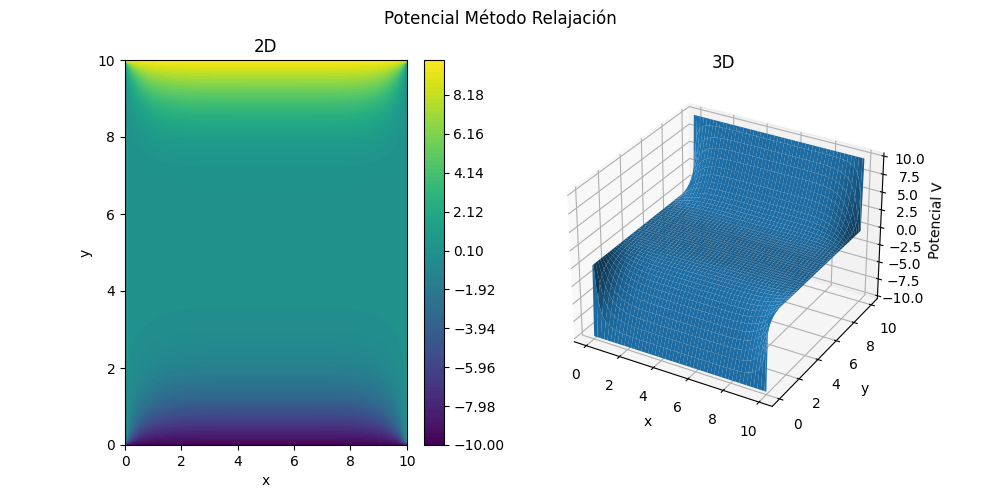

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')
fig.suptitle("Potencial Método Relajación")

X,Y = np.meshgrid(x,y)

levels = np.linspace(Vc.min()-1e-5, Vc.max()+1e-5, 100)
c = ax.contourf(X,Y,Vc.T,levels = levels)
cbar = fig.colorbar(c)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D")

ax1.plot_surface(X,Y,Vc.T)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Potencial V")
ax1.set_title("3D")

plt.savefig("compu.jpg")

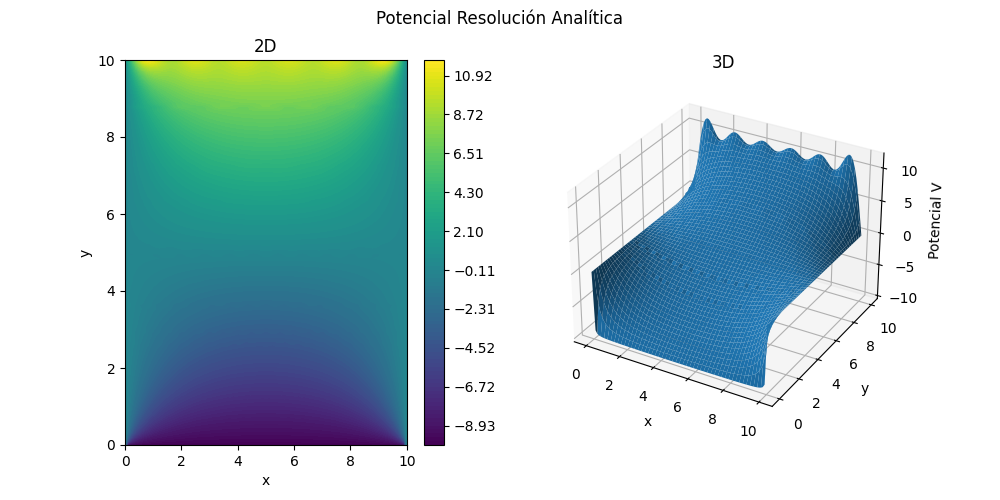

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')
fig.suptitle("Potencial Resolución Analítica")

X,Y = np.meshgrid(x,y)

levels = np.linspace(Va.min()-1e-5, Va.max()+1e-5, 100)
c = ax.contourf(X,Y,Va.T,levels = levels)
cbar = fig.colorbar(c)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D")

ax1.plot_surface(X,Y,Va.T)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Potencial V")
ax1.set_title("3D")

plt.savefig("anali.jpg")

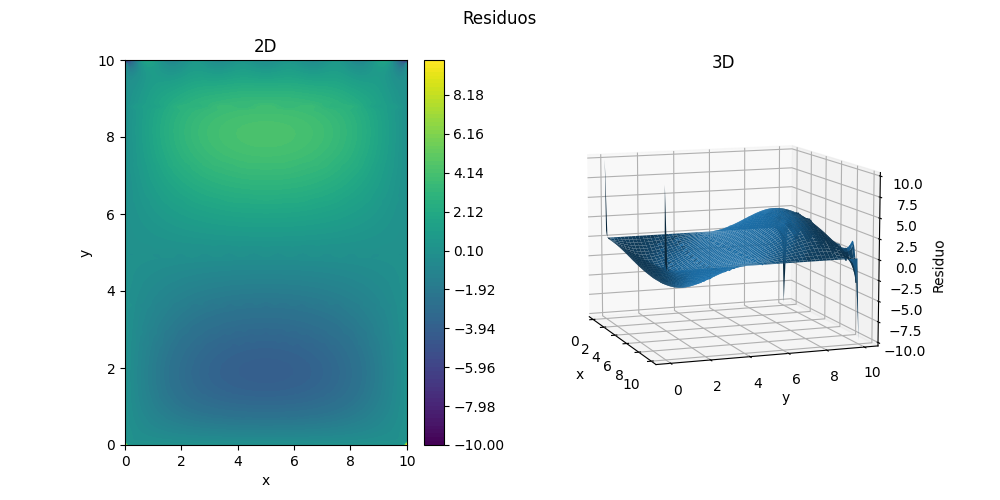

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')
fig.suptitle("Residuos")

X,Y = np.meshgrid(x,y)

Re = Va.T-Vc.T

levels = np.linspace(Re.min()-1e-5, Re.max()+1e-5, 100)
c = ax.contourf(X,Y,Re,levels = levels)
cbar = fig.colorbar(c)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D")

ax1.plot_surface(X,Y,Re)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Residuo")
ax1.set_title("3D")
ax1.view_init(elev=10, azim=340)

plt.savefig("res.jpg")